<h1>The ROC Curve</h1>

<h3>How to build a ROC Curve</h3>

<p>The ROC curve is a graph of the specificity vs the sensitivity.</p>
<p>To build and view the ROC Curve, we need to calculate the specificity and sensitivity for every possible threshold (Every predicted probability is a threshold). If we have 5 datapoints with the following predicted probabilities: 0.3, 0.4, 0.6, 0.7, 0.8, we would use each of those 5 values as a threshold.</p>

<p>To Acheive this using scikit-learn we follow the steps below:</p>

<p>1. We build a Logistic Regression model</p>

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<p>2. We first use the predict_proba method on the model to get the probabilities</p>

In [3]:
y_pred_proba = model.predict_proba(X_test)

<p>3. Scikit-learn has a roc_curve function we can use. The function takes the true target values and the predicted probabilities from our model</p>

<p>The roc_curve function returns an array of the false positive rates, an array of the true positive rates and the thresholds. The false positive rate is 1-specificity (x-axis) and the true positive rate is another term for the sensitivity (y-axis). The threshold values won’t be needed in the graph.</p>

In [4]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

<p>4. At the end, we plot the ROC curve in matplotlib. Note that we also have code for plotting a diagonal line. This can help us visually see how far our model is from a model that predicts randomly.</p>

<strong>Note that we actually plot the sensitivity vs (1-specificity). There is no strong reason for doing it this way besides that it’s the standard.</strong>

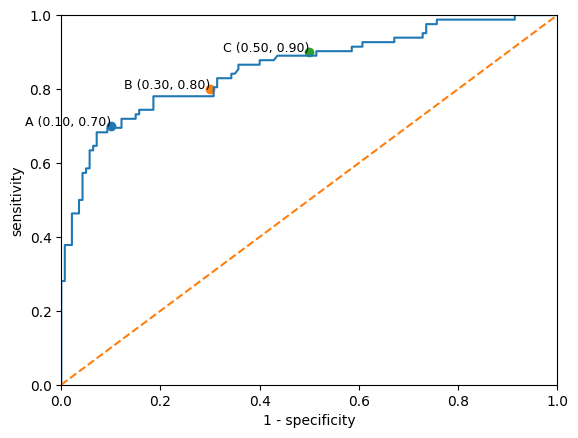

In [5]:
points = {
    'A': (0.1, 0.7),
    'B': (0.3, 0.8),
    'C': (0.5, 0.9)
}

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')

for point_name, (x, y) in points.items():
    plt.scatter(x, y, label=point_name)  # Plot the point
    plt.text(x, y, f'{point_name} ({x:.2f}, {y:.2f})', fontsize=9, ha='right')  # Add label
    
plt.show()

<strong>Alos note that as we don’t use the threshold values to build the graph, the graph does not tell us what threshold would yield each of the possible models.</strong>

<h3>ROC Curve Interpretation</h3>

<p>The ROC curve is showing the performance, not of a single model, but of many models. Each choice of threshold is a different model.</p>

<p>looking at the ROC curve above with these 3 highlighted points, we have the following models:</p>

<ul>
    <li>Model A has a sensitivity of 0.6 and a specificity of 0.95 (recall that the graph is showing 1-specificity)</li>
    <li>Model B has a sensitivity of 0.8 and a specificity of 0.7</li>
    <li>Model C has a sensitivity of 0.9 and a specificity of 0.5</li>
</ul>

<strong>How to choose between these models will depend on the specifics of our situation.</strong>

<strong>The closer the curve gets to the upper left corner, the better the performance.</strong>

<strong>The line should never fall below the diagonal line as that would mean it performs worse than a random model.</strong>

<h3>Picking a Model from the ROC Curve</h3>

<p>We need to choose a single threshold that we’ll use to make our predictions. For this we can utilize the ROC curve drawn above to choose the ideal threshold for our problem.</p>

<ul>
    <li>
        If we are in a situation where it’s more important that all of our positive predictions are correct than that we catch all the positive cases
        (meaning that we predict most of the negative cases correctly), we should choose the model with higher specificity (model A).
        <br/>
        An example here is predicting if we detect a fraudulent charge on someone’s account we’re going to disable their credit card. We therefore need to be more confident of our prediction since it might represent a major inconvenience for the customer.
    </li>
    <li>
        If we are in a situation where it’s important that we catch as many of the positive cases as possible, we should choose the model with the higher sensitivity (model C).<br/>
        An example is when we detect spam e-mail with the conseqences of placing these e-mails under a spam folder in the same mailbox. The owner of the mail adresse can then still look through these mails if he misses a certain e-mail that was predicted as spam but it is (False Positive)
    </li>
    <li>If we want a balance between sensitivity and specificity, we should choose model B.</li>
</ul>

<h3>Area Under the Curve</h3>

<p>We’ll sometimes want to use the ROC curve to compare two different models. The plot below shows a comparsion between two models; the first uses 6 features and the second one uses just the Pclass and male features</p>

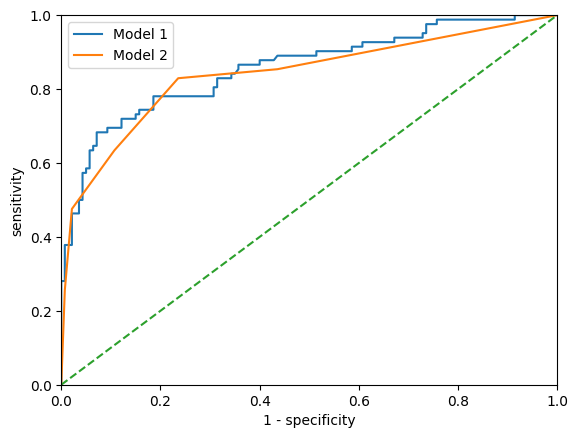

In [6]:
from sklearn.metrics import roc_auc_score

model2 = LogisticRegression()
model2.fit(X_train[:, 0:2], y_train)
y_pred_proba2 = model2.predict_proba(X_test[:, 0:2])
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_proba2[:,1])

plt.plot(fpr, tpr, label="Model 1")
plt.plot(fpr2, tpr2, label="Model 2")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.legend()
plt.show()

<p>You can see that the blue curve outperforms the orange one since the blue line is almost always above the orange line.</p>

<p>To get an empirical measure of this, we calculate the Area Under the Curve, also called the AUC.<br/>This is the area under the ROC curve. It’s a value between 0 and 1, the higher the better.</p>

<p>
    Since the ROC is a graph of all the different Logistic Regression models with different thresholds, the AUC does not measure the performance of a single model. It gives a general sense of how well the Logistic Regression model is performing.
</p>

<p>
    To get a single model, you still need to find the optimal threshold for your problem.
</p>

<p>
    Scikit-learn helps us calculate the area under the curve using the roc_auc_score function.
</p>

In [7]:
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba[:, 1]))
print("model 2 AUC score:", roc_auc_score(y_test, y_pred_proba2[:, 1]))

model 1 AUC score: 0.8572299651567944
model 2 AUC score: 0.8390679442508711


<strong>You can see that the blue line is better (graphically) and therefore Model 1 is better (empirically).</strong>

<strong>It’s important to note that this metric tells us how well in general a Logistic Regression model performs on our data.</strong>

<strong>A ROC curve shows the performance of multiple models, the AUC is not measuring the performance of a single model.</strong>